## Table of Contents
[00. Set up Connection](#00.-Set-up-Connection)

[01. Load Data](#01.-Load-Data)

[02. Study Data](#02.-Study-Data)
* [02i. Visualise Distributions](#02i.-Visualise-Distributions)
* [02ii. Find State Matches](#02ii.-Find-State-Matches)
* [02iii. Simple Data Processing](#02iii.-Simple-Data-Processing)
* [02iv. Visualise Time Plots](#02iv.-Visualise-Time-Plots)


In [1]:
# import boto3
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# from sagemaker import get_execution_role

## 00. Set up Connection

In [2]:
# s3 = boto3.resource('s3')
# # listing buckets
# ! aws s3 ls

In [3]:
# # show files in bucket
# ! aws s3 ls wwcode-covid-datasets/ --recursive

## 01. Load Data

In [4]:
# def load_data_from_s3(bucket, data_key):
#     data_location = 's3://{}/{}'.format(bucket, data_key)
#     data = pd.read_csv(data_location)
#     return data

In [5]:
# role = get_execution_role()
# bucket='wwcode-covid-datasets'

# # covid data figures
# data_key = 'coronadatascraper/202007270201/coronadatascraper-timeseries__202007270201__202007270201.csv.gz'
# covid_df = load_data_from_s3(bucket, data_key)

# # mobility data figures
# data_key = 'apple-mobility-trends-reports/dataset/apple-mobility-trends-reports.csv'
# mobility_df = load_data_from_s3(bucket, data_key)

In [6]:
covid_df = pd.read_csv('data/coronadatascraper_202007270201_coronadatascraper-timeseries__202007270201__202007270201.csv.gz', compression='gzip', error_bad_lines=False)
mobility_df = pd.read_csv('data/apple-mobility-trends-reports_dataset_apple-mobility-trends-reports.csv')

In [7]:
covid_df.head()

,name,level,city,county,state,country,population,lat,long,url,...,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthfactor,date,last_updated_at,state_fips
0,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22,2020-07-27T02:01:25,NaN
1,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-23,2020-07-27T02:01:25,NaN
2,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-24,2020-07-27T02:01:25,NaN
3,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-25,2020-07-27T02:01:25,NaN
4,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-26,2020-07-27T02:01:25,NaN


In [8]:
mobility_df.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,153.00,169.21,178.32,185.37,166.63,162.41,164.63,169.36,190.83,206.45
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,137.78,128.27,137.61,107.59,136.33,127.42,128.96,131.30,133.39,137.95
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,54.05,65.19,63.43,41.21,66.69,54.61,55.66,57.26,67.02,63.70
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,39.18,47.81,43.67,32.06,50.69,43.16,41.49,42.23,49.10,46.25
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,106.12,103.27,84.93,88.73,89.78,92.33,93.33,98.55,98.50,75.84


## 02. Study Data

In [9]:
np.issubdtype(mobility_df['2020-01-13'].dtype, np.number)

True

In [10]:
mobility_df['geo_type'].drop_duplicates()

0       country/region
153               city
939         sub-region
1535            county
Name: geo_type, dtype: object

### 02i. Visualise Distributions

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Displaying info for column "name"...


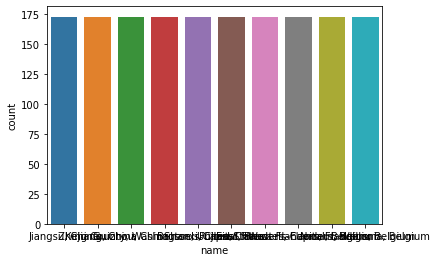

Displaying info for column "level"...


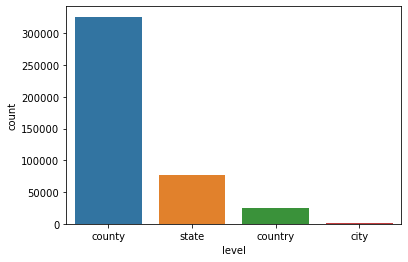

Displaying info for column "city"...


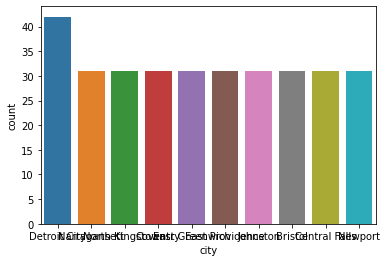

Displaying info for column "county"...


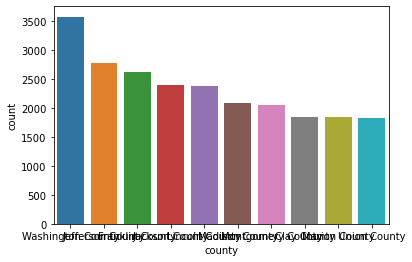

Displaying info for column "state"...


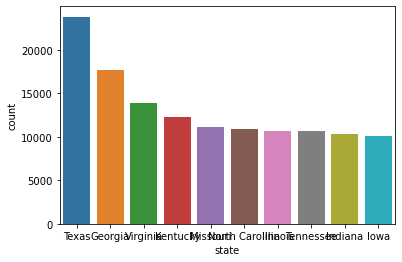

Displaying info for column "country"...


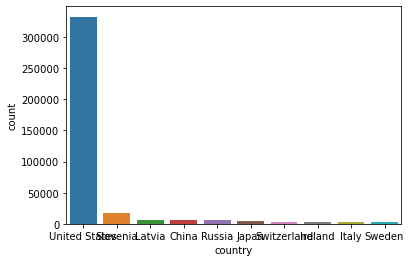

Displaying info for column "population"...


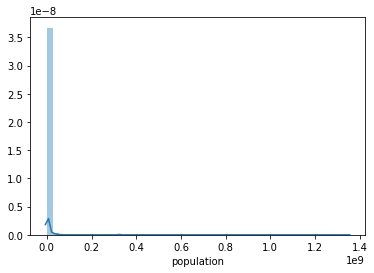

Displaying info for column "lat"...


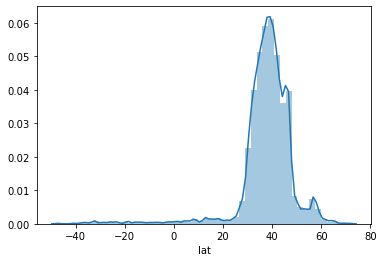

Displaying info for column "long"...


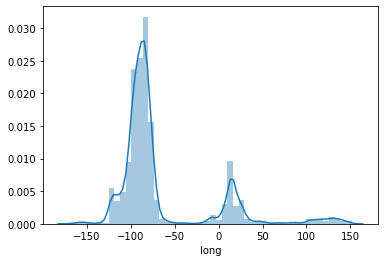

Displaying info for column "url"...


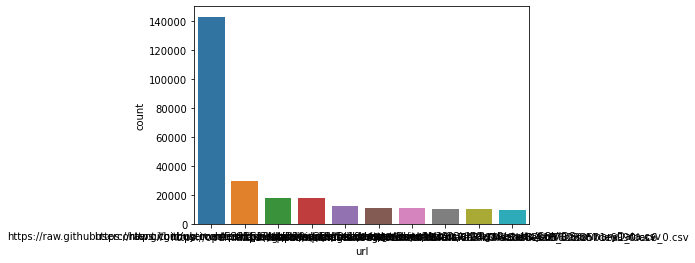

Displaying info for column "aggregate"...


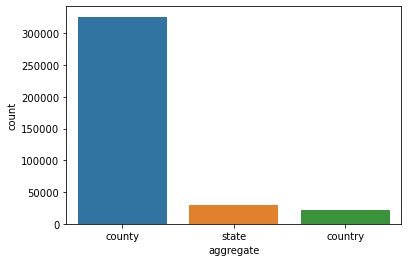

Displaying info for column "tz"...


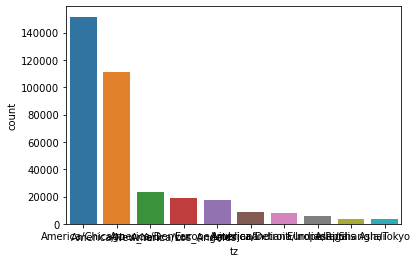

Displaying info for column "cases"...


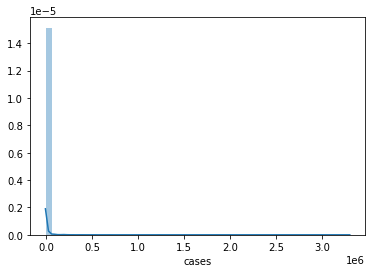

Displaying info for column "deaths"...


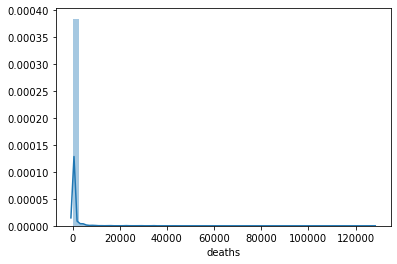

Displaying info for column "recovered"...


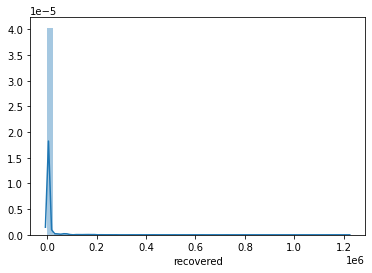

Displaying info for column "active"...


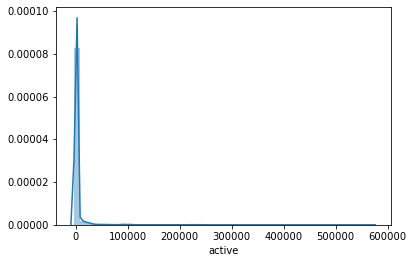

Displaying info for column "tested"...


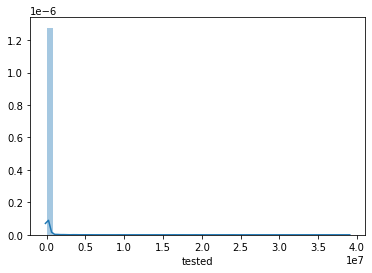

Displaying info for column "hospitalized"...


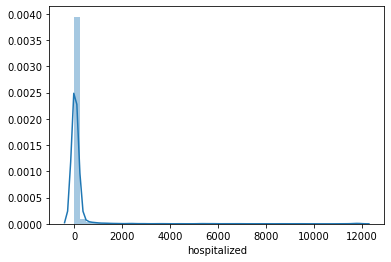

Displaying info for column "hospitalized_current"...


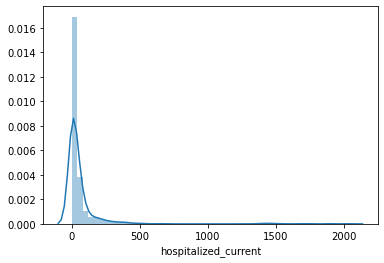

Displaying info for column "discharged"...


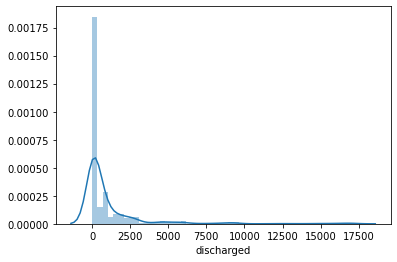

Displaying info for column "icu"...


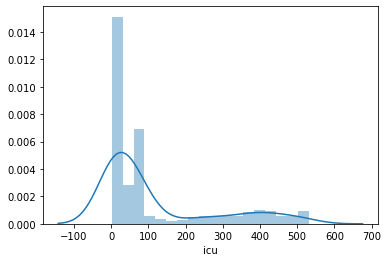

Displaying info for column "icu_current"...


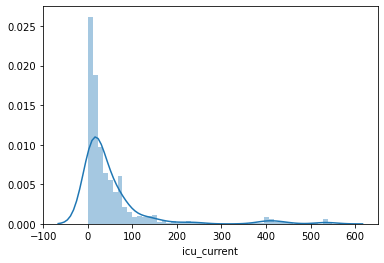

Displaying info for column "growthfactor"...


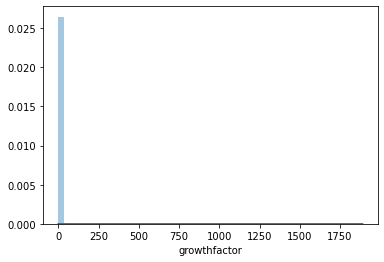

Displaying info for column "date"...


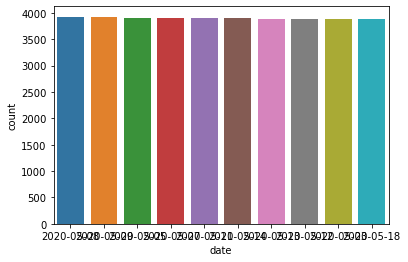

Displaying info for column "last_updated_at"...


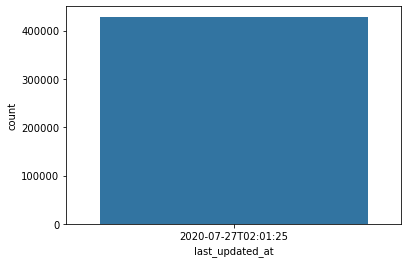

Displaying info for column "state_fips"...


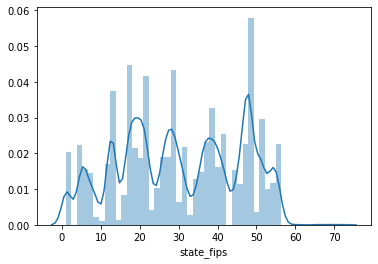

In [12]:
def get_data_info_by_columns(data, cols = 'unspecified'):
    cols = data.columns
    for col in cols:
        print('Displaying info for column "'+col+'"...')
        if np.issubdtype(data[col].dtype, np.number):
            ax = sns.distplot(data[col])
        else:
            ax = sns.countplot(x=col, data=data, order=data[col].value_counts().iloc[:10].index)
        plt.show()
            
get_data_info_by_columns(covid_df)

In [13]:
print(covid_df.columns)
print(mobility_df.columns)

Index(['name', 'level', 'city', 'county', 'state', 'country', 'population',
       'lat', 'long', 'url', 'aggregate', 'tz', 'cases', 'deaths', 'recovered',
       'active', 'tested', 'hospitalized', 'hospitalized_current',
       'discharged', 'icu', 'icu_current', 'growthfactor', 'date',
       'last_updated_at', 'state_fips'],
      dtype='object')
Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
       '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25'],
      dtype='object', length=201)


Displaying info for column "geo_type"...


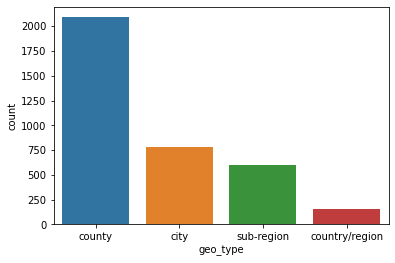

Displaying info for column "region"...


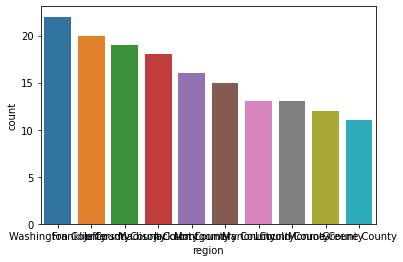

Displaying info for column "transportation_type"...


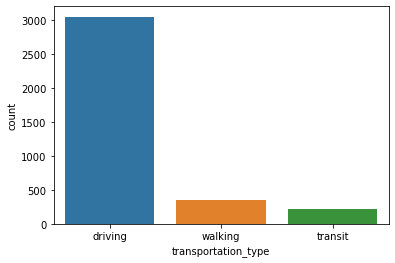

Displaying info for column "alternative_name"...


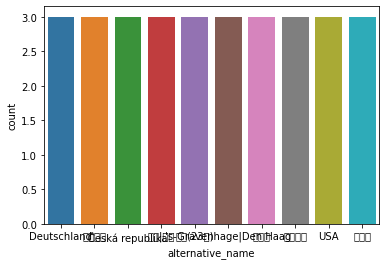

Displaying info for column "sub-region"...


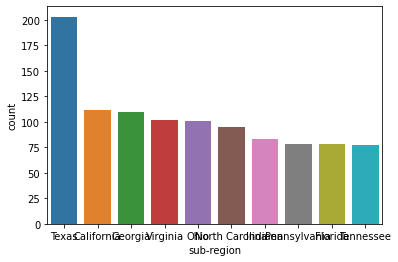

Displaying info for column "country"...


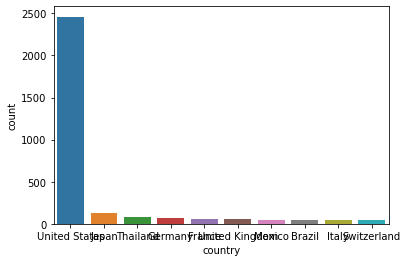

Displaying info for column "2020-01-13"...


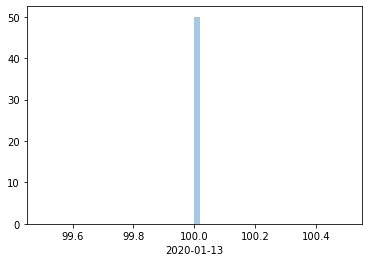

Displaying info for column "2020-01-14"...


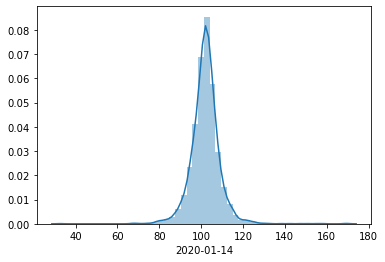

Displaying info for column "2020-01-15"...


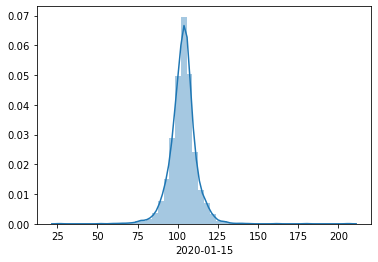

Displaying info for column "2020-01-16"...


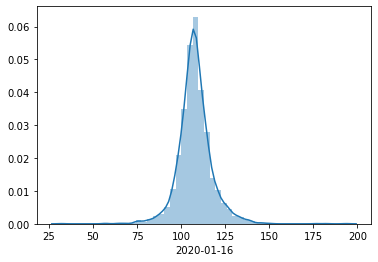

Displaying info for column "2020-01-17"...


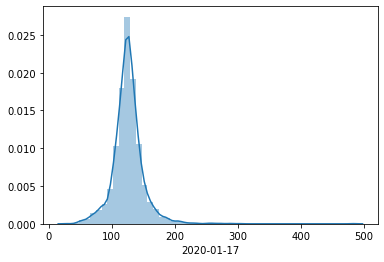

Displaying info for column "2020-01-18"...


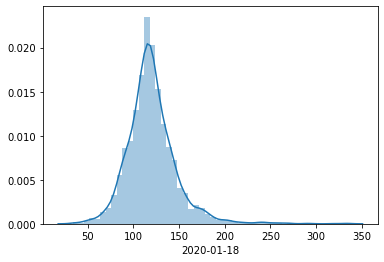

Displaying info for column "2020-01-19"...


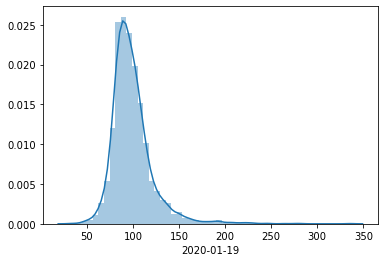

Displaying info for column "2020-01-20"...


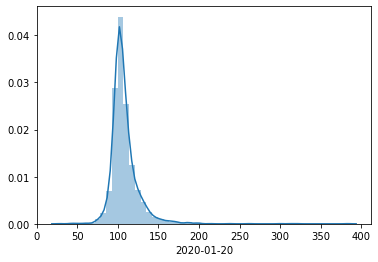

Displaying info for column "2020-01-21"...


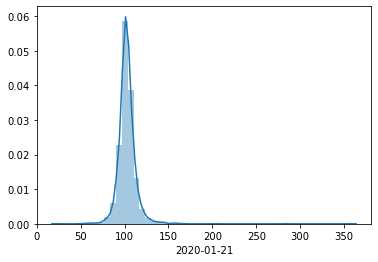

Displaying info for column "2020-01-22"...


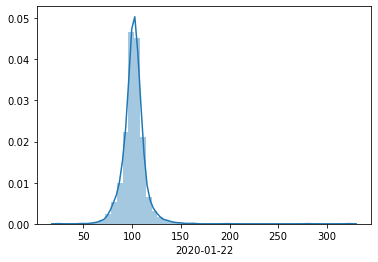

Displaying info for column "2020-01-23"...


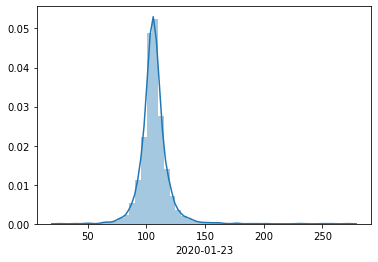

Displaying info for column "2020-01-24"...


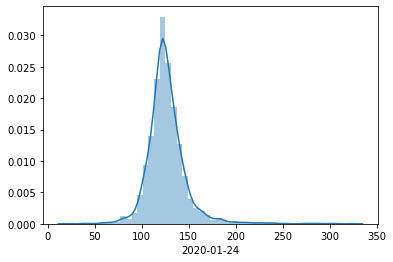

Displaying info for column "2020-01-25"...


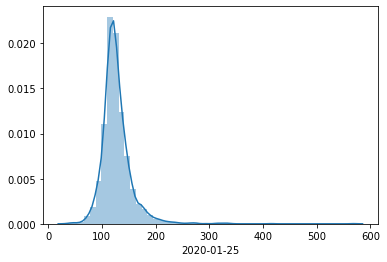

Displaying info for column "2020-01-26"...


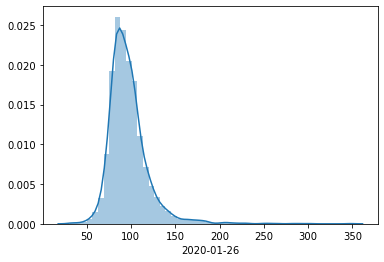

Displaying info for column "2020-01-27"...


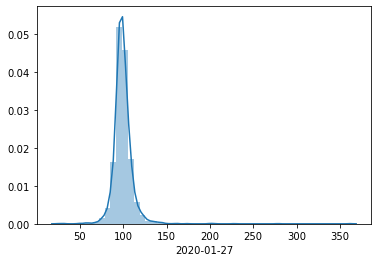

Displaying info for column "2020-01-28"...


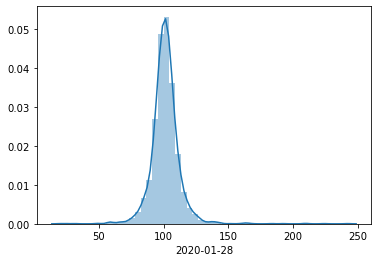

Displaying info for column "2020-01-29"...


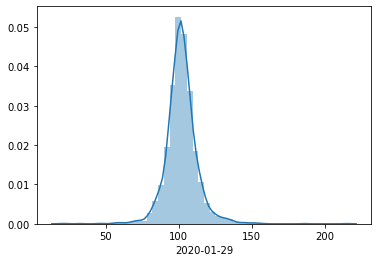

Displaying info for column "2020-01-30"...


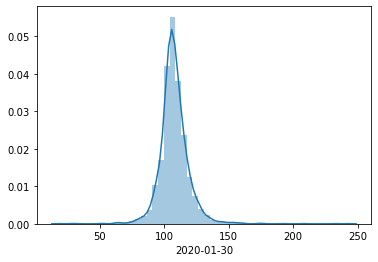

Displaying info for column "2020-01-31"...


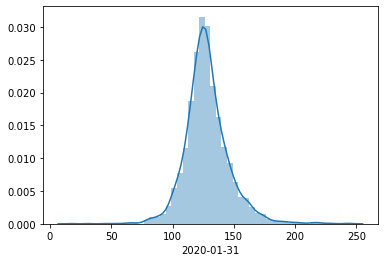

Displaying info for column "2020-02-01"...


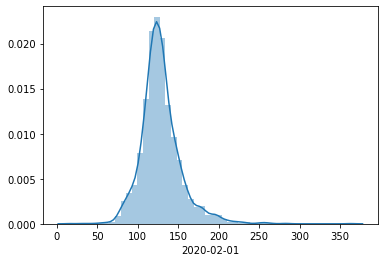

Displaying info for column "2020-02-02"...


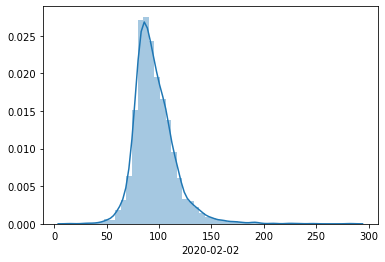

Displaying info for column "2020-02-03"...


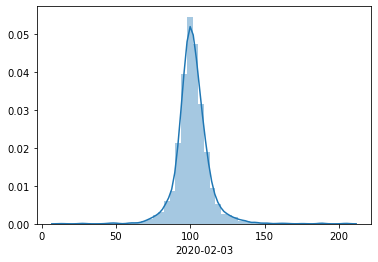

Displaying info for column "2020-02-04"...


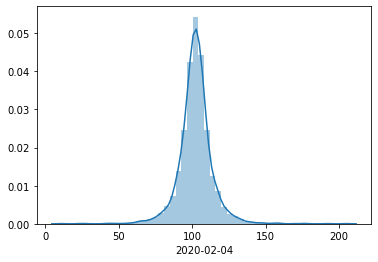

Displaying info for column "2020-02-05"...


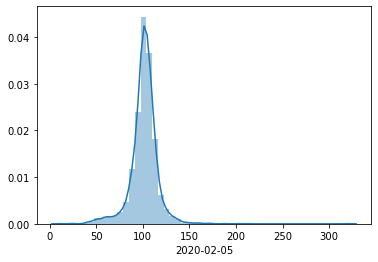

Displaying info for column "2020-02-06"...


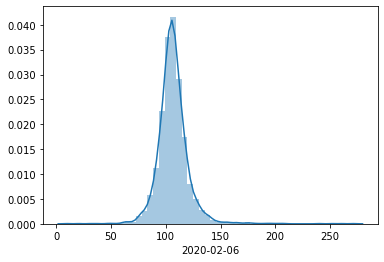

Displaying info for column "2020-02-07"...


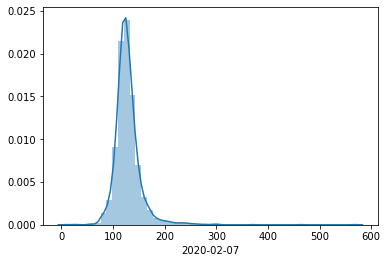

Displaying info for column "2020-02-08"...


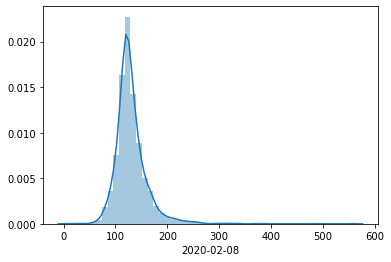

Displaying info for column "2020-02-09"...


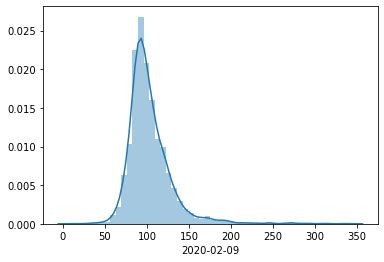

Displaying info for column "2020-02-10"...


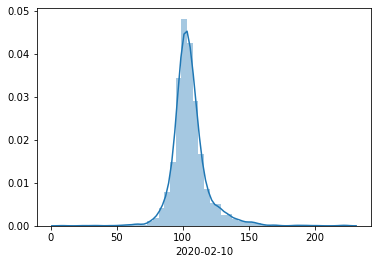

Displaying info for column "2020-02-11"...


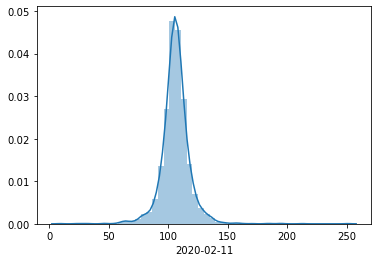

Displaying info for column "2020-02-12"...


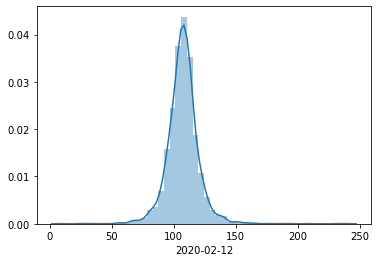

Displaying info for column "2020-02-13"...


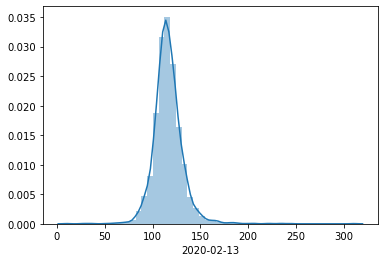

Displaying info for column "2020-02-14"...


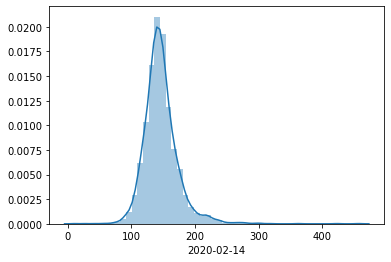

Displaying info for column "2020-02-15"...


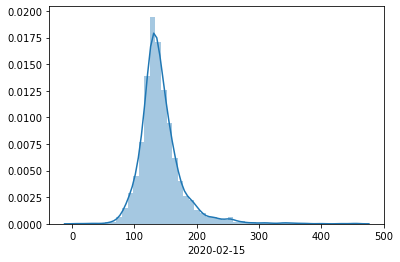

Displaying info for column "2020-02-16"...


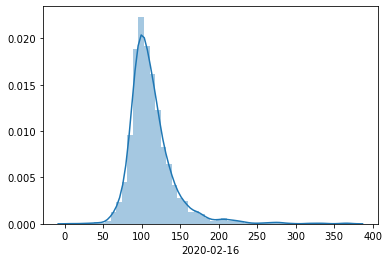

Displaying info for column "2020-02-17"...


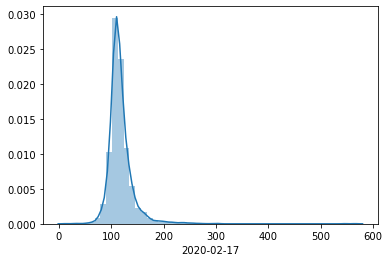

Displaying info for column "2020-02-18"...


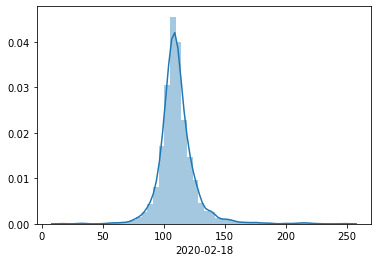

Displaying info for column "2020-02-19"...


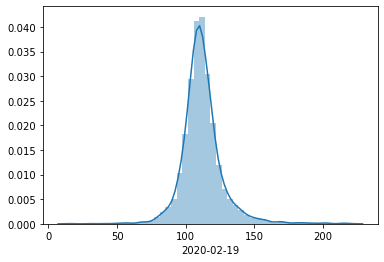

Displaying info for column "2020-02-20"...


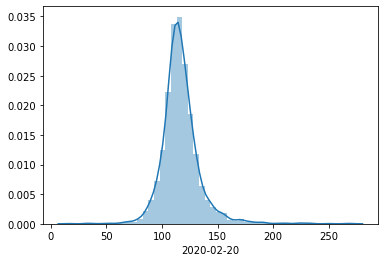

Displaying info for column "2020-02-21"...


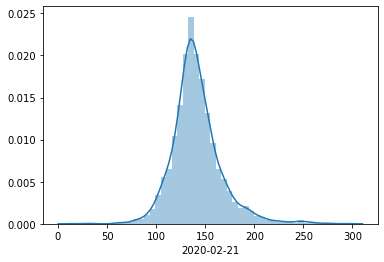

Displaying info for column "2020-02-22"...


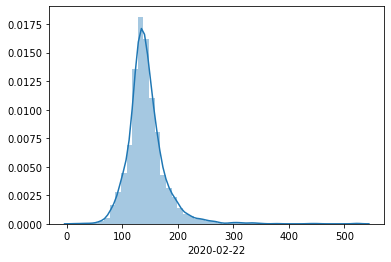

Displaying info for column "2020-02-23"...


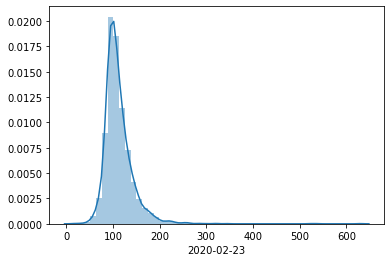

Displaying info for column "2020-02-24"...


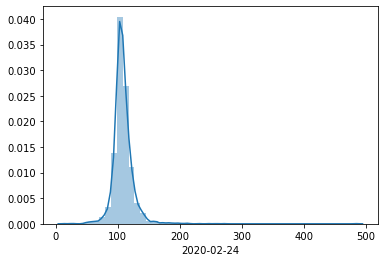

Displaying info for column "2020-02-25"...


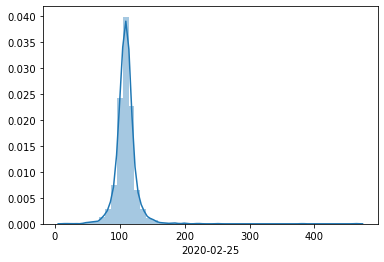

Displaying info for column "2020-02-26"...


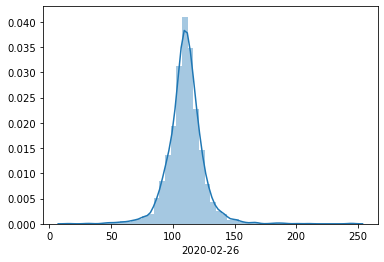

Displaying info for column "2020-02-27"...


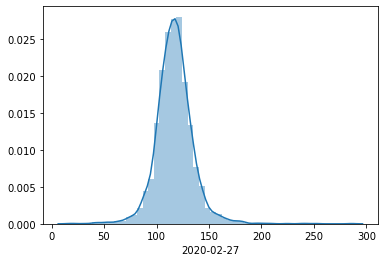

Displaying info for column "2020-02-28"...


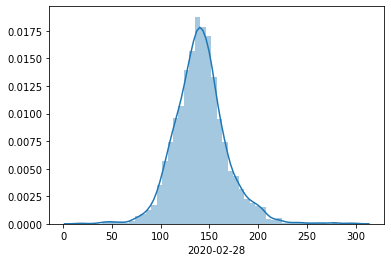

Displaying info for column "2020-02-29"...


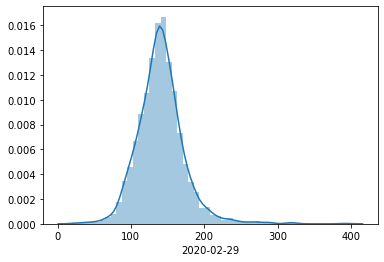

Displaying info for column "2020-03-01"...


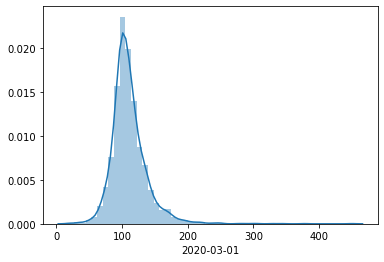

Displaying info for column "2020-03-02"...


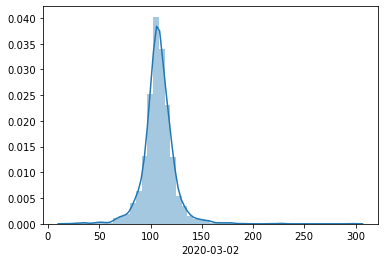

Displaying info for column "2020-03-03"...


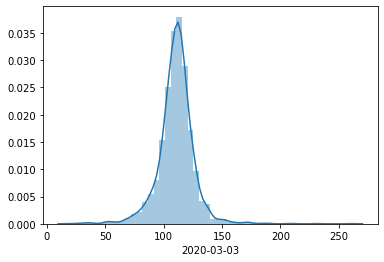

Displaying info for column "2020-03-04"...


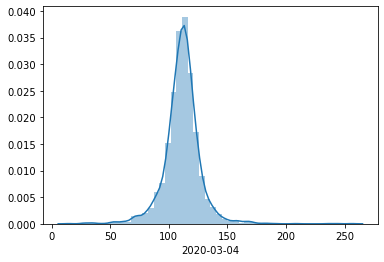

Displaying info for column "2020-03-05"...


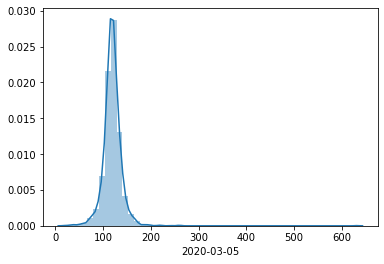

Displaying info for column "2020-03-06"...


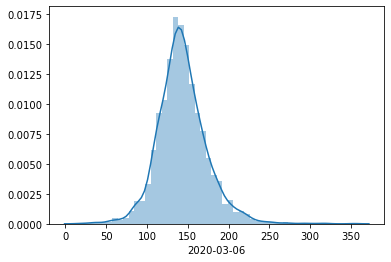

Displaying info for column "2020-03-07"...


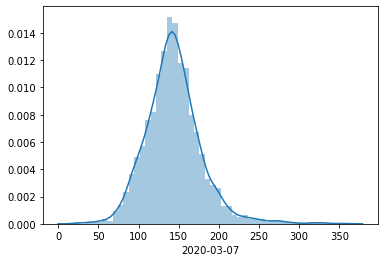

Displaying info for column "2020-03-08"...


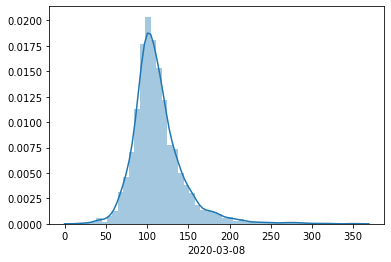

Displaying info for column "2020-03-09"...


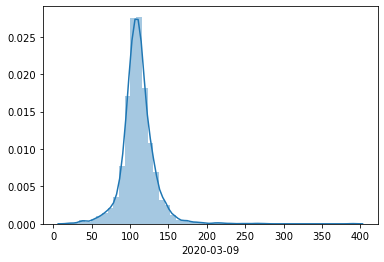

Displaying info for column "2020-03-10"...


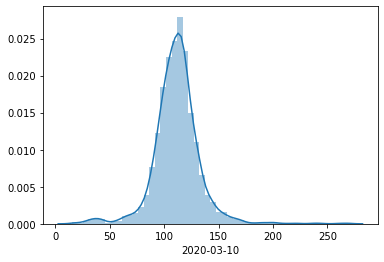

Displaying info for column "2020-03-11"...


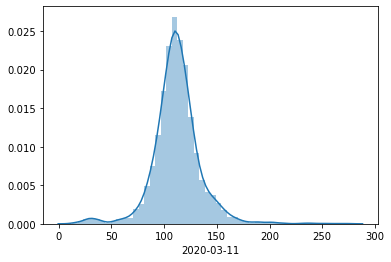

Displaying info for column "2020-03-12"...


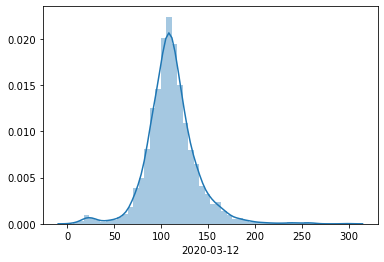

Displaying info for column "2020-03-13"...


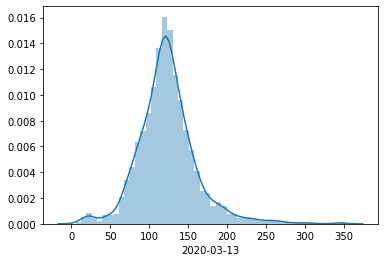

Displaying info for column "2020-03-14"...


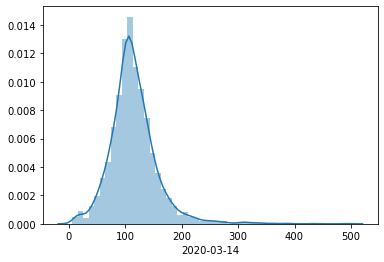

Displaying info for column "2020-03-15"...


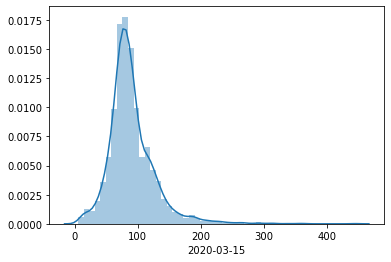

Displaying info for column "2020-03-16"...


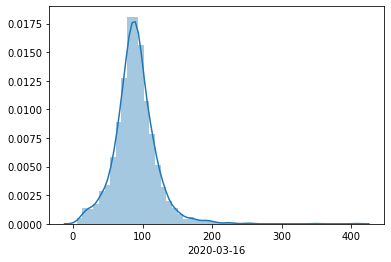

Displaying info for column "2020-03-17"...


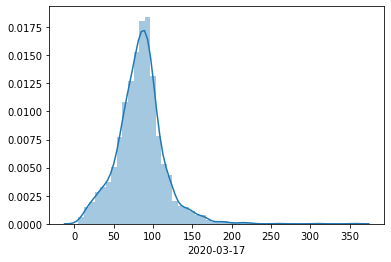

Displaying info for column "2020-03-18"...


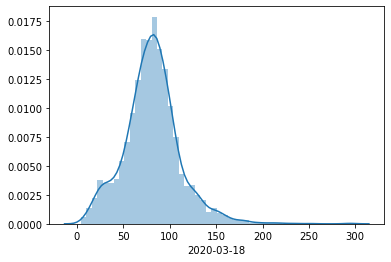

Displaying info for column "2020-03-19"...


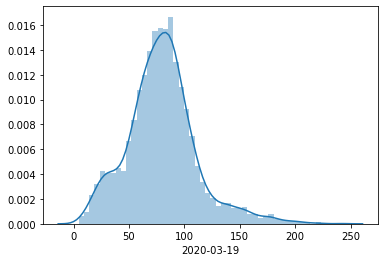

Displaying info for column "2020-03-20"...


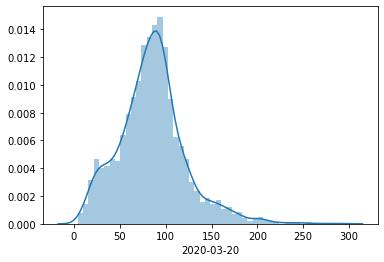

Displaying info for column "2020-03-21"...


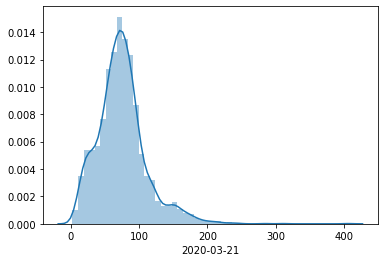

Displaying info for column "2020-03-22"...


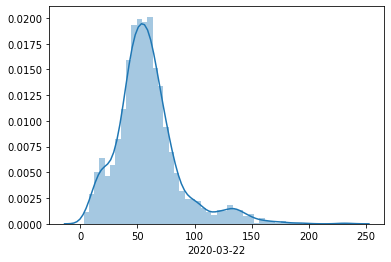

Displaying info for column "2020-03-23"...


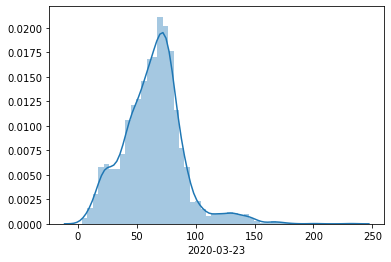

Displaying info for column "2020-03-24"...


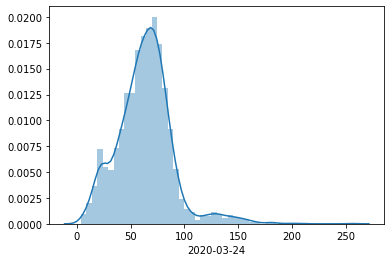

Displaying info for column "2020-03-25"...


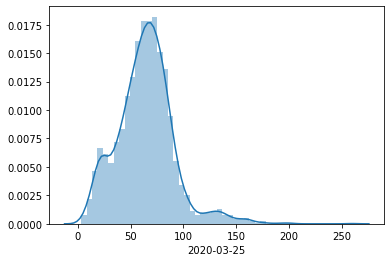

Displaying info for column "2020-03-26"...


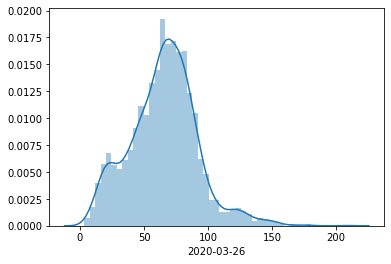

Displaying info for column "2020-03-27"...


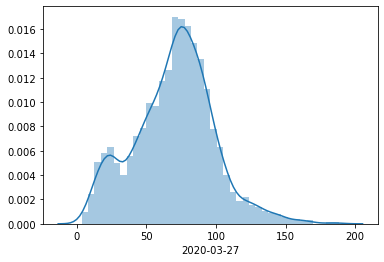

Displaying info for column "2020-03-28"...


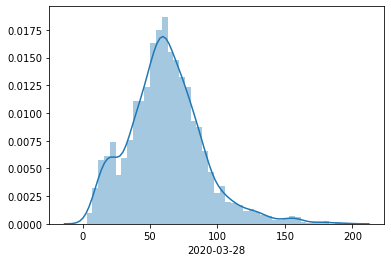

Displaying info for column "2020-03-29"...


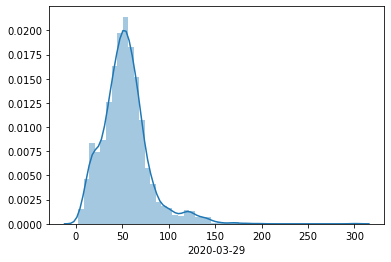

Displaying info for column "2020-03-30"...


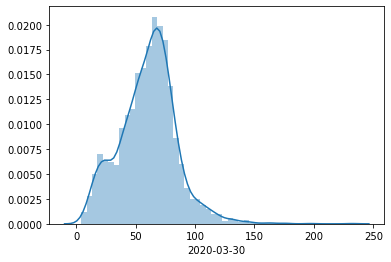

Displaying info for column "2020-03-31"...


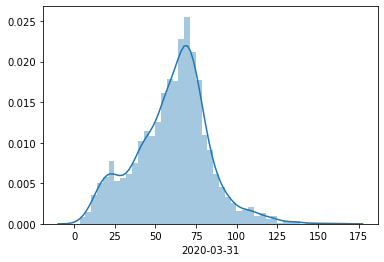

Displaying info for column "2020-04-01"...


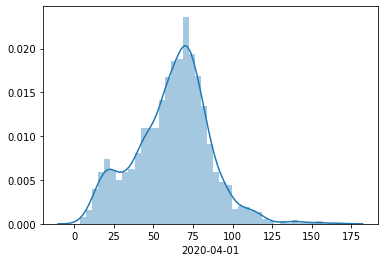

Displaying info for column "2020-04-02"...


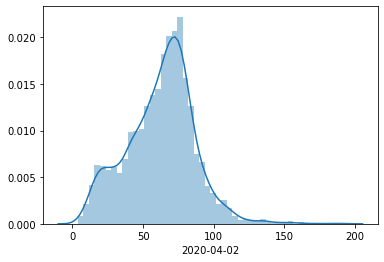

Displaying info for column "2020-04-03"...


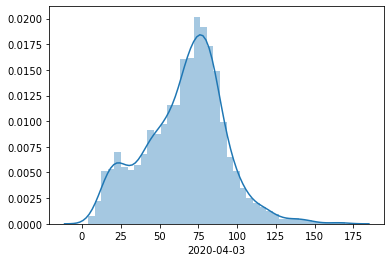

Displaying info for column "2020-04-04"...


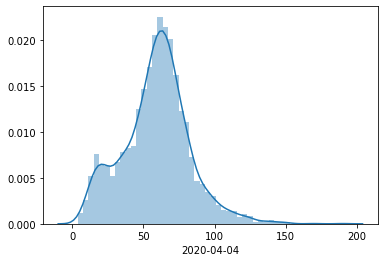

Displaying info for column "2020-04-05"...


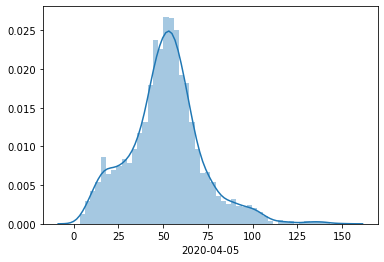

Displaying info for column "2020-04-06"...


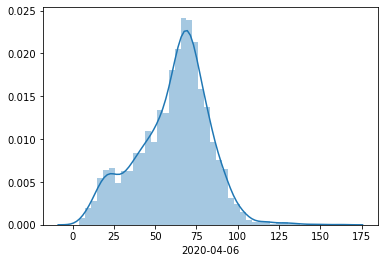

Displaying info for column "2020-04-07"...


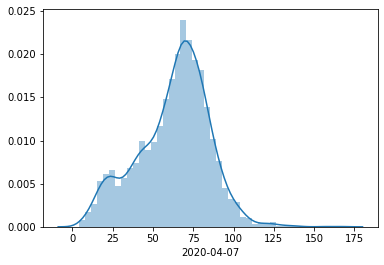

Displaying info for column "2020-04-08"...


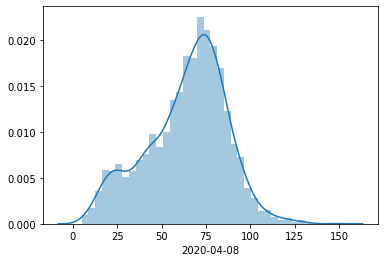

Displaying info for column "2020-04-09"...


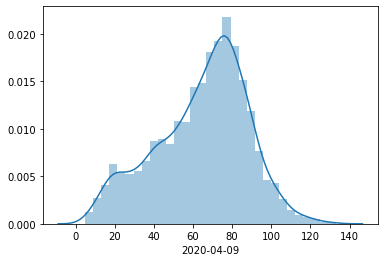

Displaying info for column "2020-04-10"...


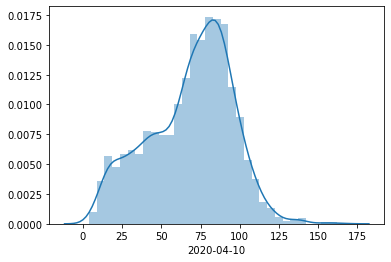

Displaying info for column "2020-04-11"...


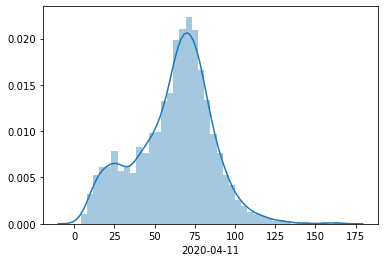

Displaying info for column "2020-04-12"...


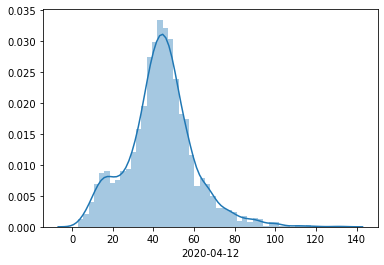

Displaying info for column "2020-04-13"...


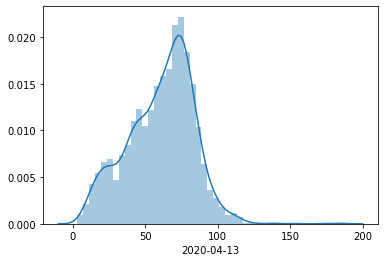

Displaying info for column "2020-04-14"...


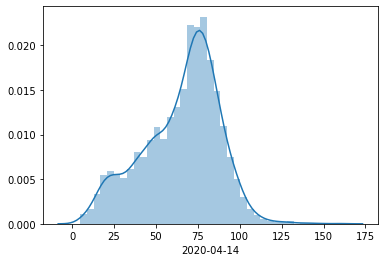

Displaying info for column "2020-04-15"...


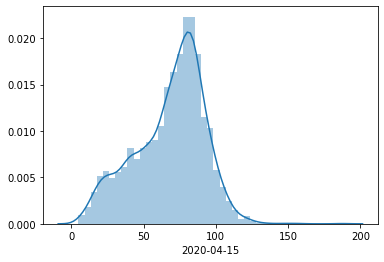

Displaying info for column "2020-04-16"...


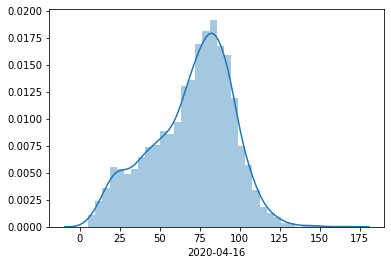

Displaying info for column "2020-04-17"...


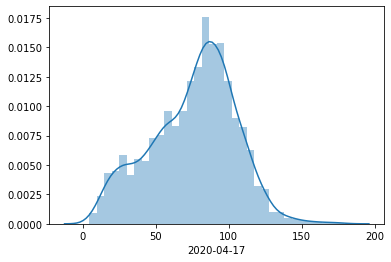

Displaying info for column "2020-04-18"...


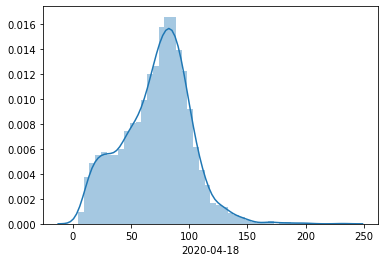

Displaying info for column "2020-04-19"...


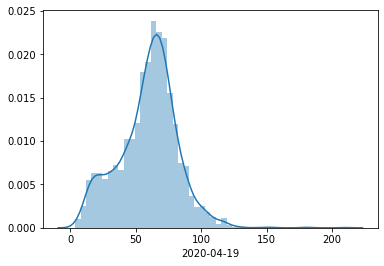

Displaying info for column "2020-04-20"...


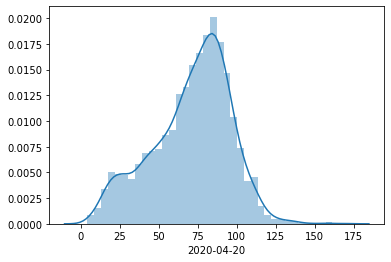

Displaying info for column "2020-04-21"...


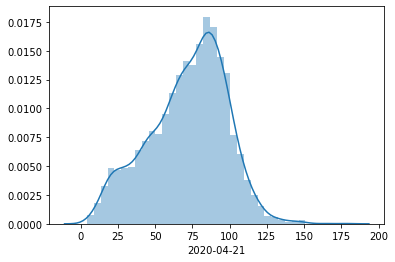

Displaying info for column "2020-04-22"...


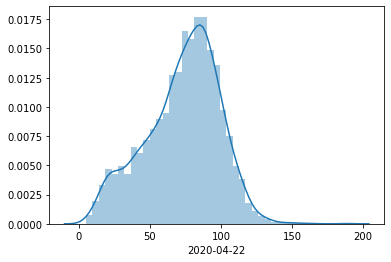

Displaying info for column "2020-04-23"...


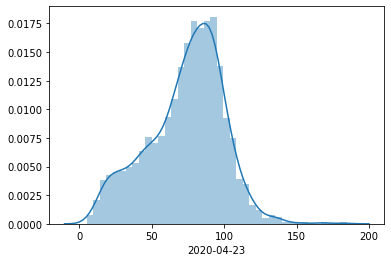

Displaying info for column "2020-04-24"...


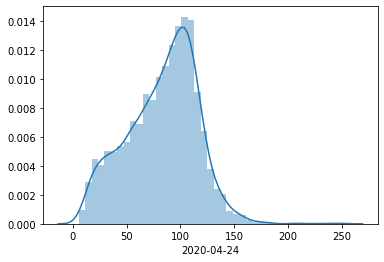

Displaying info for column "2020-04-25"...


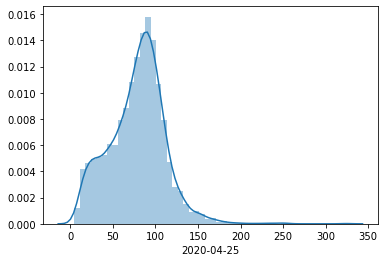

Displaying info for column "2020-04-26"...


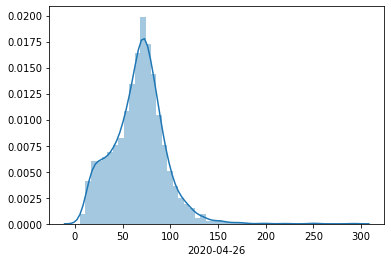

Displaying info for column "2020-04-27"...


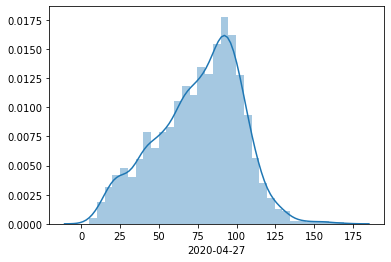

Displaying info for column "2020-04-28"...


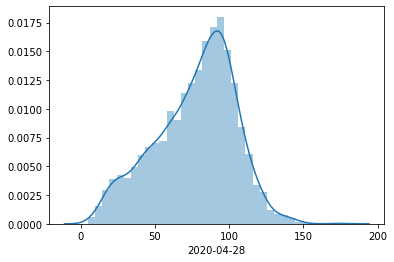

Displaying info for column "2020-04-29"...


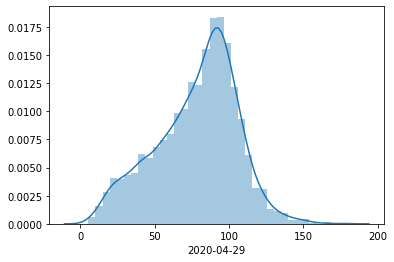

Displaying info for column "2020-04-30"...


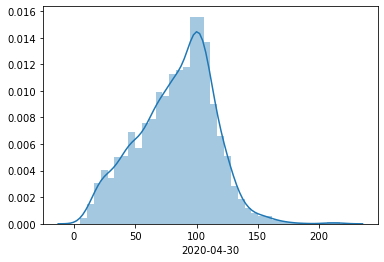

Displaying info for column "2020-05-01"...


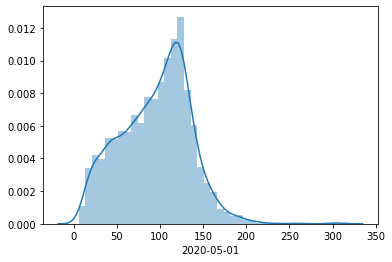

Displaying info for column "2020-05-02"...


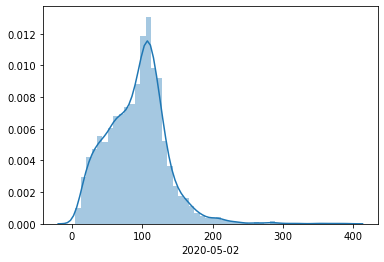

Displaying info for column "2020-05-03"...


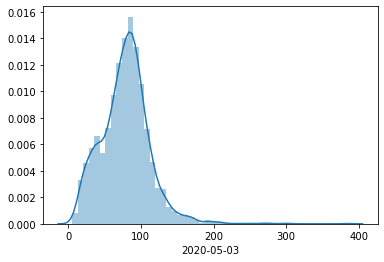

Displaying info for column "2020-05-04"...


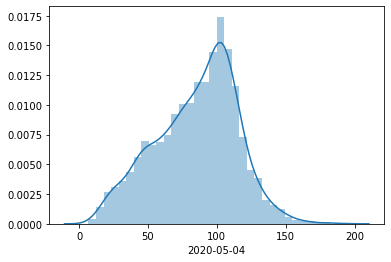

Displaying info for column "2020-05-05"...


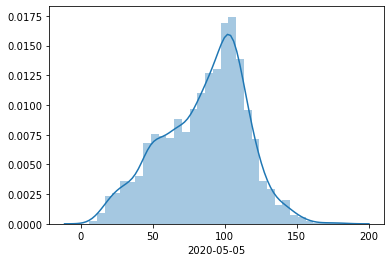

Displaying info for column "2020-05-06"...


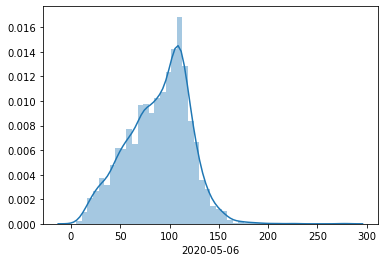

Displaying info for column "2020-05-07"...


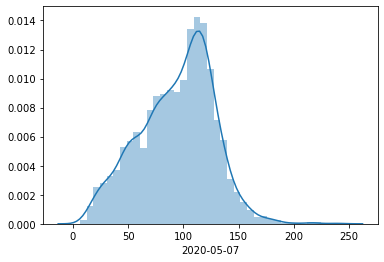

Displaying info for column "2020-05-08"...


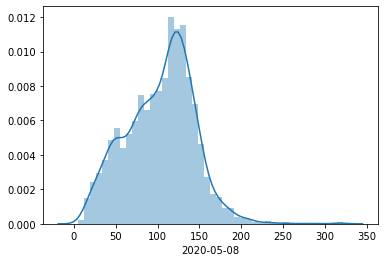

Displaying info for column "2020-05-09"...


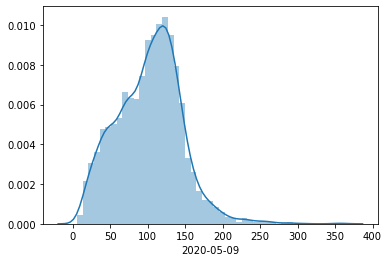

Displaying info for column "2020-05-10"...


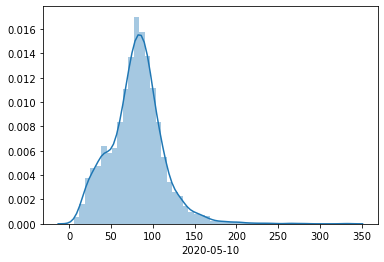

Displaying info for column "2020-05-11"...


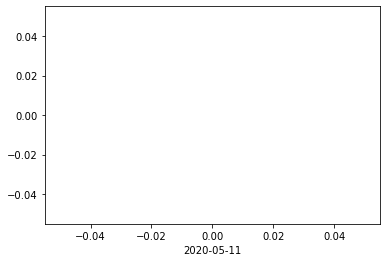

Displaying info for column "2020-05-12"...


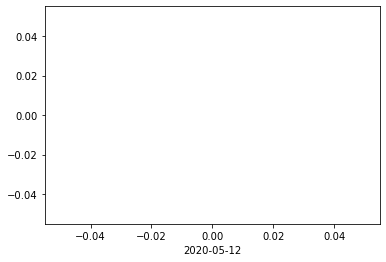

Displaying info for column "2020-05-13"...


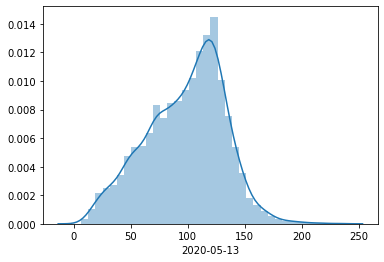

Displaying info for column "2020-05-14"...


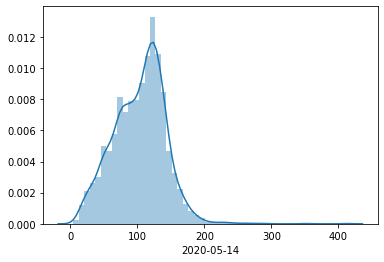

Displaying info for column "2020-05-15"...


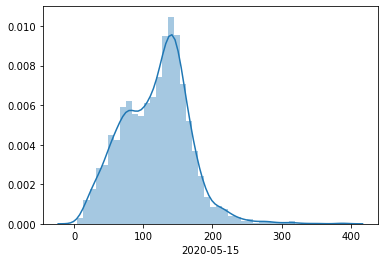

Displaying info for column "2020-05-16"...


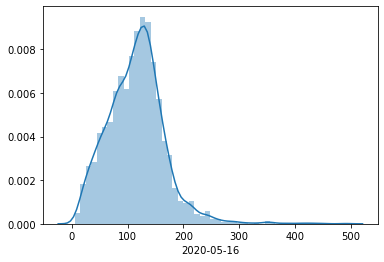

Displaying info for column "2020-05-17"...


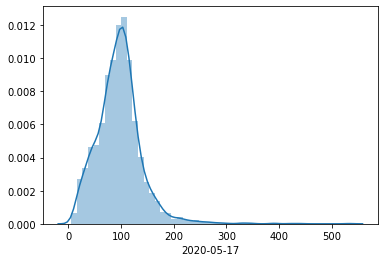

Displaying info for column "2020-05-18"...


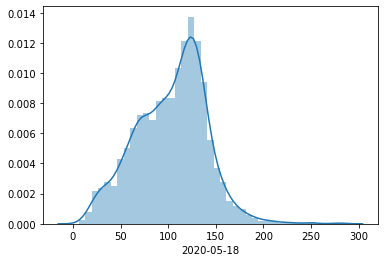

Displaying info for column "2020-05-19"...


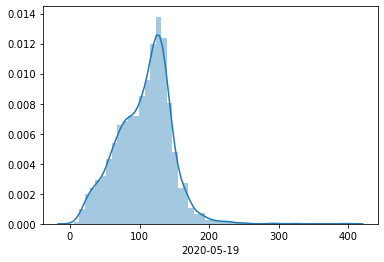

Displaying info for column "2020-05-20"...


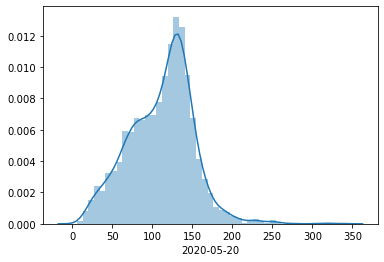

Displaying info for column "2020-05-21"...


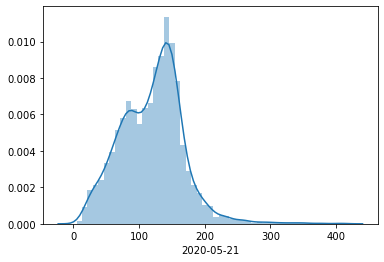

Displaying info for column "2020-05-22"...


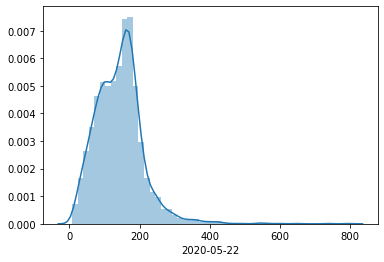

Displaying info for column "2020-05-23"...


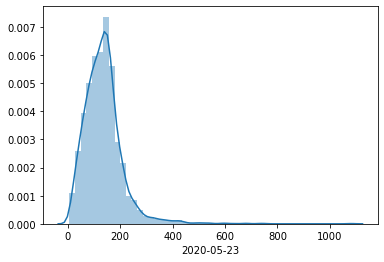

Displaying info for column "2020-05-24"...


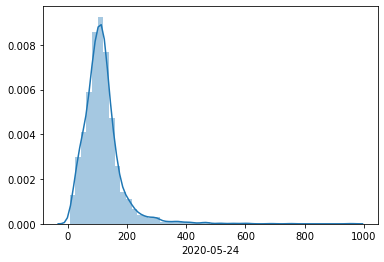

Displaying info for column "2020-05-25"...


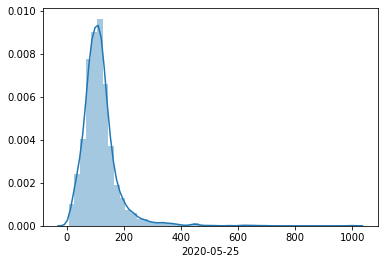

Displaying info for column "2020-05-26"...


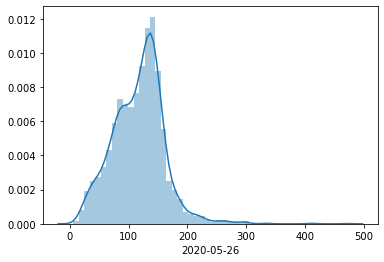

Displaying info for column "2020-05-27"...


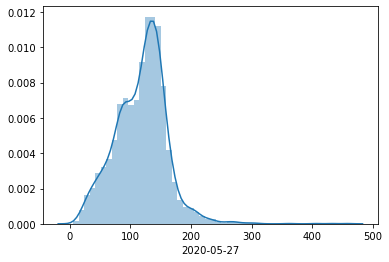

Displaying info for column "2020-05-28"...


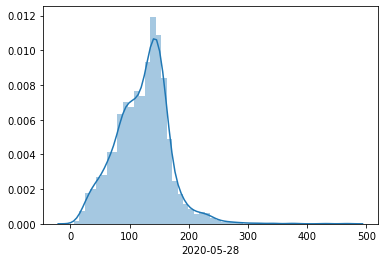

Displaying info for column "2020-05-29"...


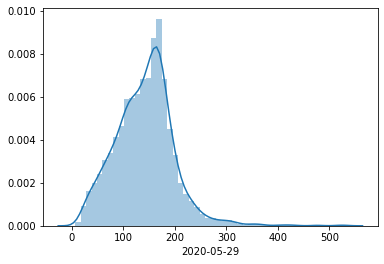

Displaying info for column "2020-05-30"...


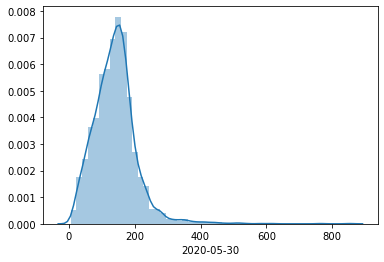

Displaying info for column "2020-05-31"...


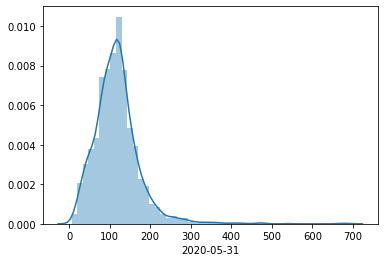

Displaying info for column "2020-06-01"...


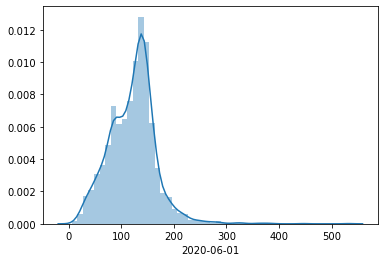

Displaying info for column "2020-06-02"...


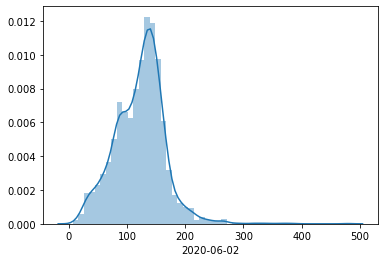

Displaying info for column "2020-06-03"...


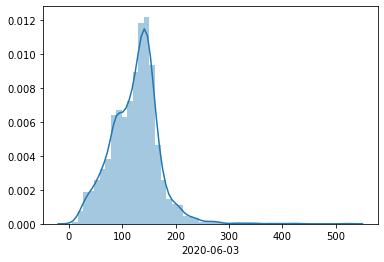

Displaying info for column "2020-06-04"...


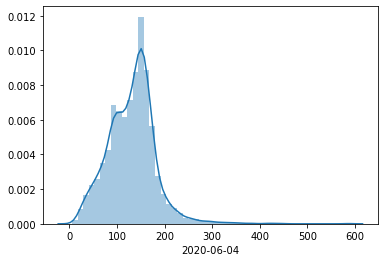

Displaying info for column "2020-06-05"...


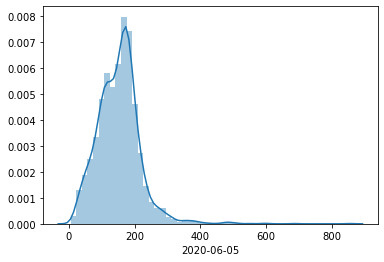

Displaying info for column "2020-06-06"...


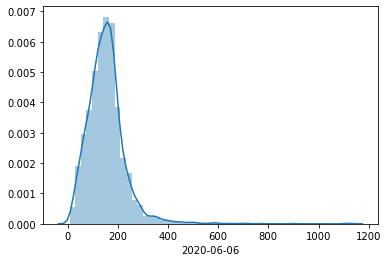

Displaying info for column "2020-06-07"...


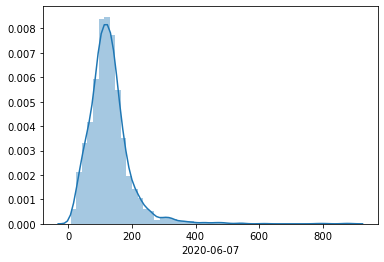

Displaying info for column "2020-06-08"...


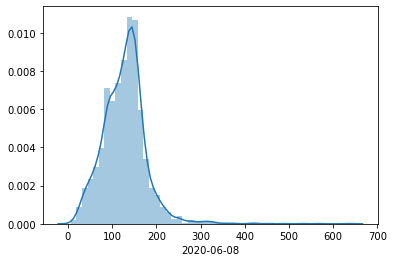

Displaying info for column "2020-06-09"...


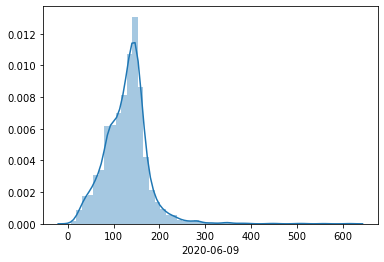

Displaying info for column "2020-06-10"...


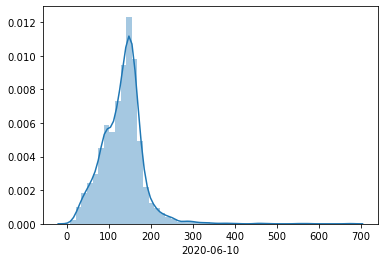

Displaying info for column "2020-06-11"...


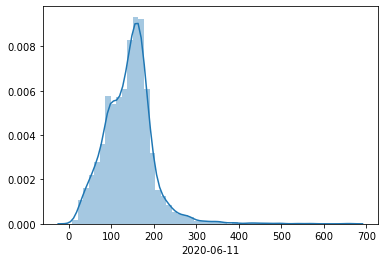

Displaying info for column "2020-06-12"...


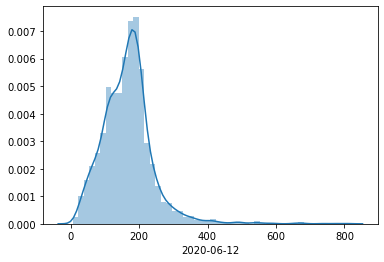

Displaying info for column "2020-06-13"...


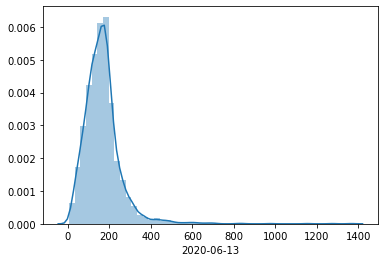

Displaying info for column "2020-06-14"...


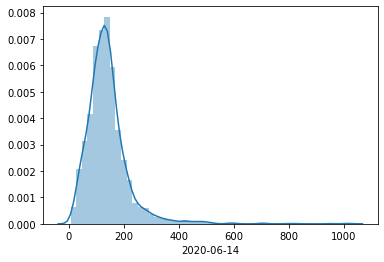

Displaying info for column "2020-06-15"...


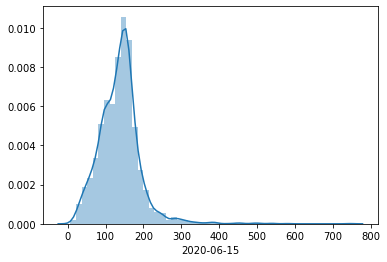

Displaying info for column "2020-06-16"...


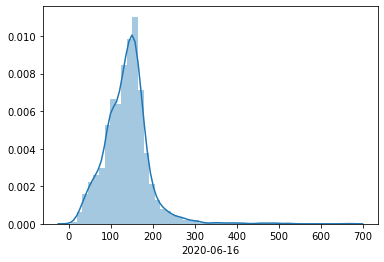

Displaying info for column "2020-06-17"...


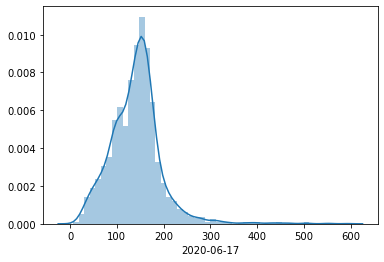

Displaying info for column "2020-06-18"...


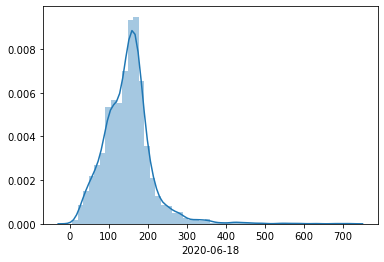

Displaying info for column "2020-06-19"...


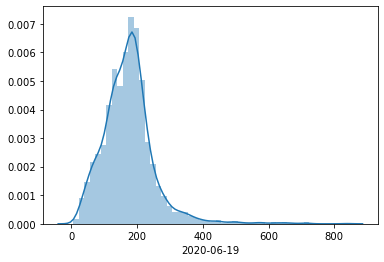

Displaying info for column "2020-06-20"...


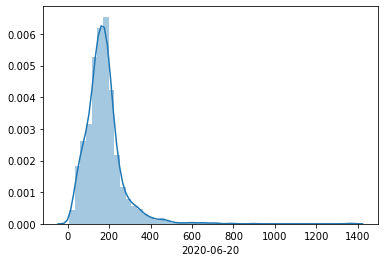

Displaying info for column "2020-06-21"...


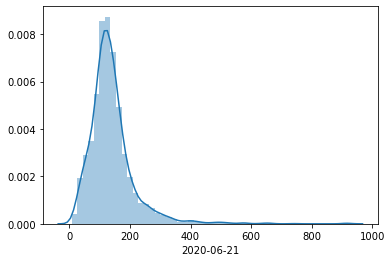

Displaying info for column "2020-06-22"...


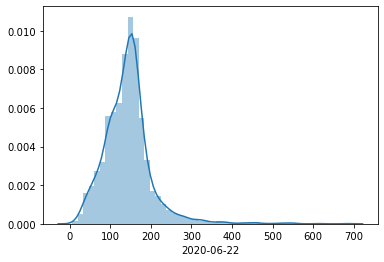

Displaying info for column "2020-06-23"...


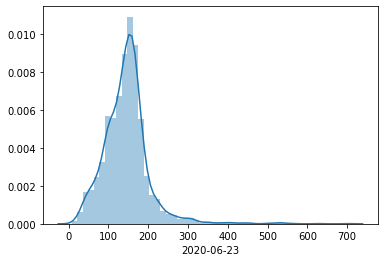

Displaying info for column "2020-06-24"...


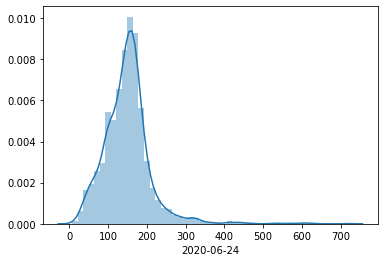

Displaying info for column "2020-06-25"...


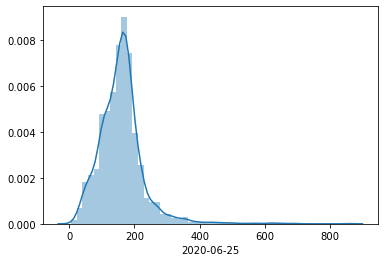

Displaying info for column "2020-06-26"...


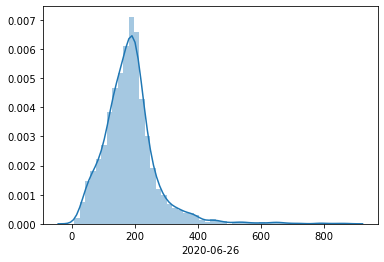

Displaying info for column "2020-06-27"...


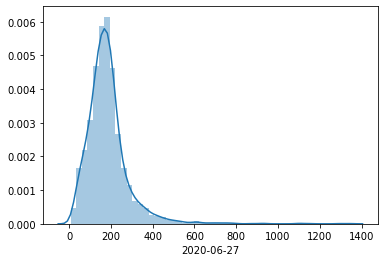

Displaying info for column "2020-06-28"...


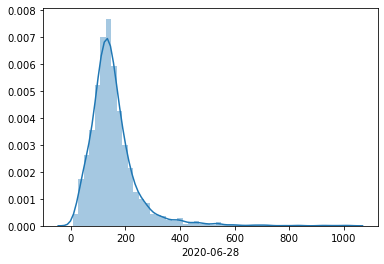

Displaying info for column "2020-06-29"...


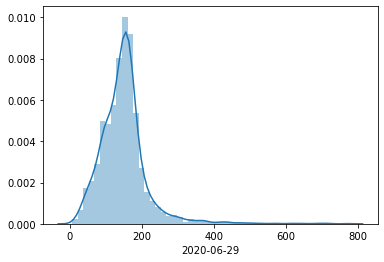

Displaying info for column "2020-06-30"...


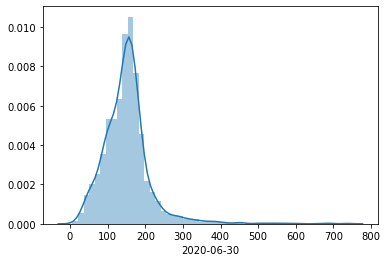

Displaying info for column "2020-07-01"...


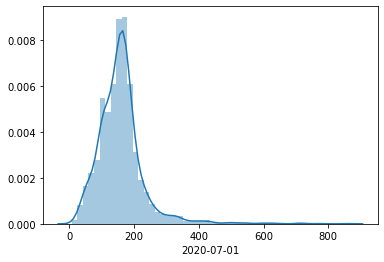

Displaying info for column "2020-07-02"...


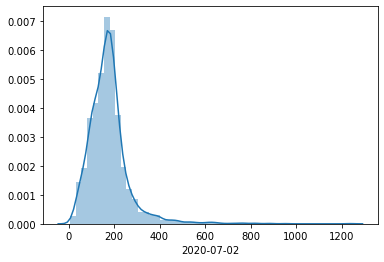

Displaying info for column "2020-07-03"...


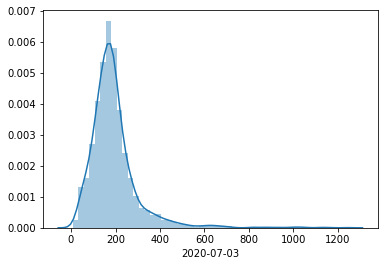

Displaying info for column "2020-07-04"...


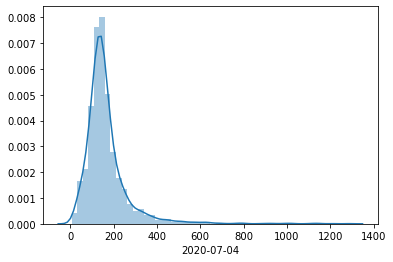

Displaying info for column "2020-07-05"...


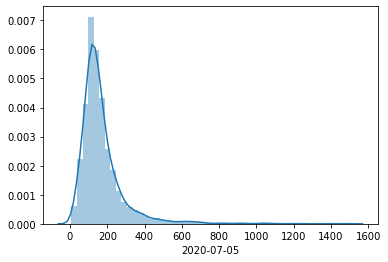

Displaying info for column "2020-07-06"...


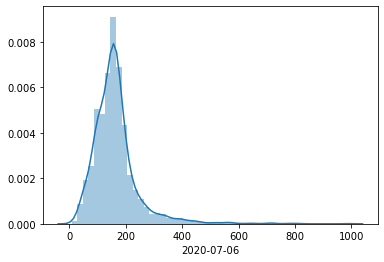

Displaying info for column "2020-07-07"...


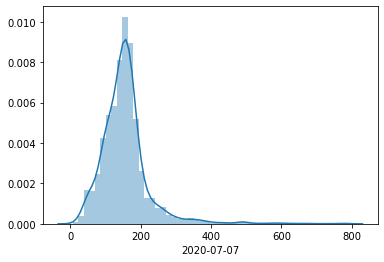

Displaying info for column "2020-07-08"...


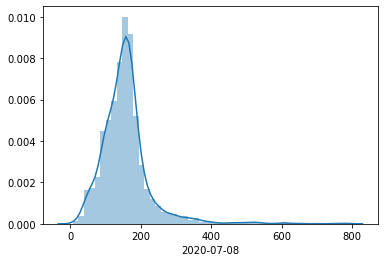

Displaying info for column "2020-07-09"...


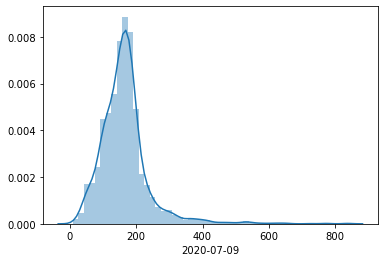

Displaying info for column "2020-07-10"...


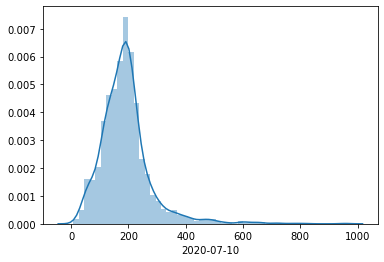

Displaying info for column "2020-07-11"...


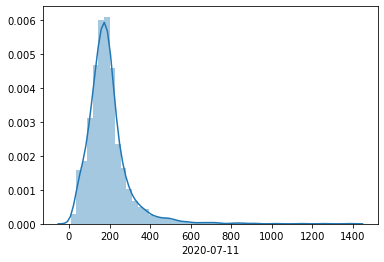

Displaying info for column "2020-07-12"...


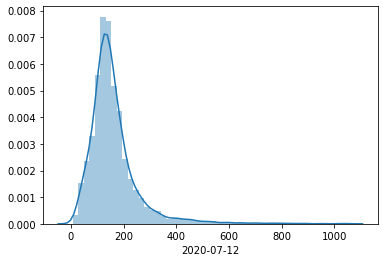

Displaying info for column "2020-07-13"...


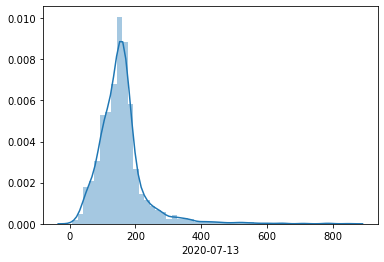

Displaying info for column "2020-07-14"...


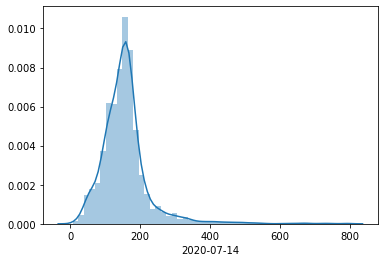

Displaying info for column "2020-07-15"...


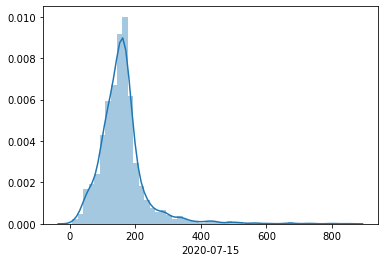

Displaying info for column "2020-07-16"...


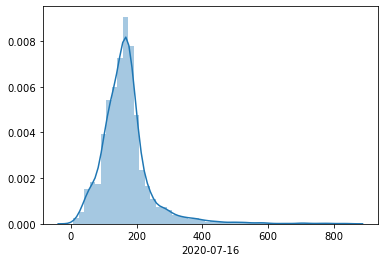

Displaying info for column "2020-07-17"...


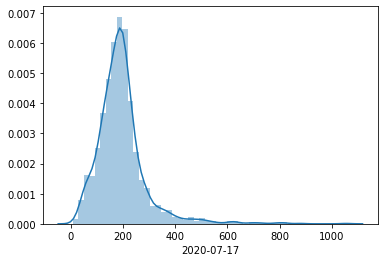

Displaying info for column "2020-07-18"...


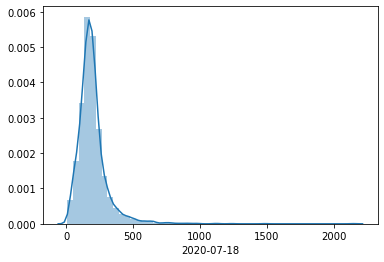

Displaying info for column "2020-07-19"...


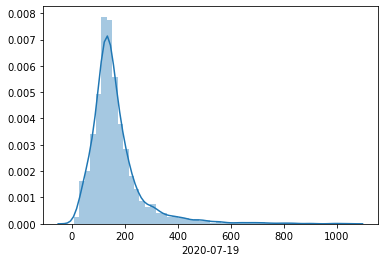

Displaying info for column "2020-07-20"...


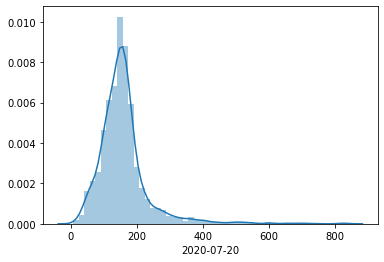

Displaying info for column "2020-07-21"...


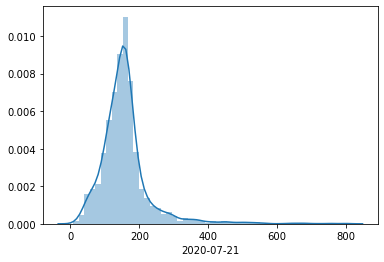

Displaying info for column "2020-07-22"...


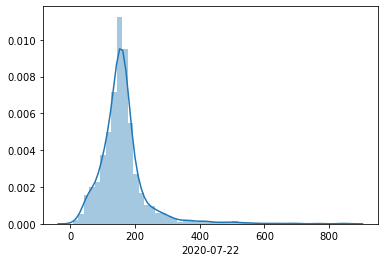

Displaying info for column "2020-07-23"...


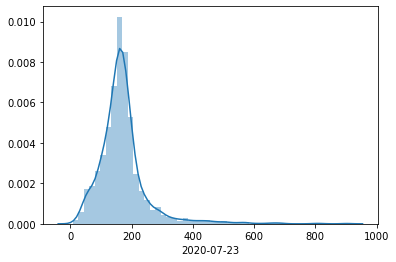

Displaying info for column "2020-07-24"...


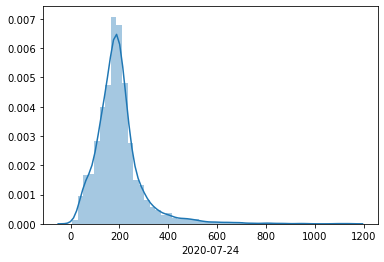

Displaying info for column "2020-07-25"...


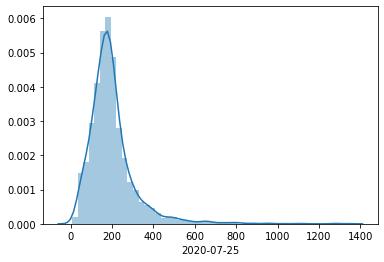

In [14]:
get_data_info_by_columns(mobility_df, cols=['geo_type', 'region', 'transportation_type', 'alternative_name', 'sub-region', 
                                            'country', '2020-01-13', '2020-01-14', '2020-01-15', '2020-07-23', '2020-07-24', '2020-07-25'])

### 02ii. Find State Matches

In [15]:
print(set(mobility_df['region']))
print(set(mobility_df['sub-region']))
print(set(mobility_df['country']))

{'Oswego County', 'Roi Et Province', 'Muskingum County', 'Williamson County', 'Hinds County', 'Aiken County', 'Yazoo County', 'Hot Spring County', 'Tulsa County', 'San Francisco County', 'King George County', 'Surry County', 'Dublin', 'Hampton County', 'Belo Horizonte', 'Katowice', 'Nassau County', 'Clarion County', 'Niigata Prefecture', 'Nantes', 'Wiesbaden', 'Krabi Province', 'Kandiyohi County', 'Redwood County', 'Gratiot County', 'Falls County', 'Forrest County', 'Riley County', 'Louisville', 'Cocke County', 'Rabun County', 'Champagne-Ardenne Region', 'Grenada County', 'Denton County', 'Okaloosa County', 'Manchester', 'Baltimore City', 'King County', 'Okayama', 'Sergipe', 'Lafourche Parish', 'Saunders County', 'Shenandoah County', 'Tarapacá Region', 'San Mateo County', 'Roosevelt County', 'Goiânia', 'St. Clair County', 'Cook County', 'Chester County', 'Brisbane', 'Cincinnati', 'Callaway County', 'Washita County', 'Nakhon Ratchasima Province', 'Limburg', 'Abruzzo Region', 'McMinn Cou

In [16]:
usa_covid_df = covid_df[covid_df['country']=='United States']
usa_mobility_df = mobility_df[mobility_df['country']=='United States']

In [17]:
print(set(usa_covid_df['state']))

{nan, 'Iowa', 'Arkansas', 'Connecticut', 'Tennessee', 'American Samoa', 'Alabama', 'Colorado', 'Georgia', 'Pennsylvania', 'Idaho', 'Mississippi', 'Missouri', 'Kansas', 'Nevada', 'New York', 'South Carolina', 'Vermont', 'Guam', 'Washington, D.C.', 'North Carolina', 'Texas', 'Oregon', 'Louisiana', 'Maine', 'Massachusetts', 'New Hampshire', 'United States Virgin Islands', 'Nebraska', 'Northern Mariana Islands', 'Maryland', 'Kentucky', 'Ohio', 'New Mexico', 'Hawaii', 'Montana', 'Indiana', 'South Dakota', 'California', 'Oklahoma', 'Michigan', 'Illinois', 'Minnesota', 'West Virginia', 'Rhode Island', 'North Dakota', 'Arizona', 'Utah', 'Wyoming', 'Washington', 'Delaware', 'Florida', 'Puerto Rico', 'Alaska', 'Virginia', 'New Jersey', 'Wisconsin'}


In [18]:
print(set(usa_mobility_df['sub-region']))

{nan, 'Iowa', 'Arkansas', 'Connecticut', 'Tennessee', 'Alabama', 'Georgia', 'Colorado', 'Pennsylvania', 'Idaho', 'Missouri', 'Mississippi', 'New York', 'Nevada', 'Kansas', 'South Carolina', 'Vermont', 'Guam', 'North Carolina', 'Texas', 'Oregon', 'Louisiana', 'Maine', 'Massachusetts', 'New Hampshire', 'Nebraska', 'Maryland', 'Kentucky', 'Ohio', 'New Mexico', 'Hawaii', 'Montana', 'Virgin Islands', 'Indiana', 'South Dakota', 'California', 'Oklahoma', 'Michigan', 'Illinois', 'Minnesota', 'West Virginia', 'Rhode Island', 'North Dakota', 'Arizona', 'Utah', 'Wyoming', 'Washington', 'Florida', 'Delaware', 'Puerto Rico', 'Alaska', 'Virginia', 'New Jersey', 'Wisconsin'}


In [19]:
# check differences
[i for i in set(usa_covid_df['state']) if i not in set(usa_mobility_df['sub-region'])]

['American Samoa',
 'Washington, D.C.',
 'United States Virgin Islands',
 'Northern Mariana Islands']

In [20]:
# check differences
[i for i in set(usa_mobility_df['sub-region']) if i not in set(usa_covid_df['state'])]

['Virgin Islands']

### 02iii. Simple Data Processing

In [21]:
# replace following, rest are ignored
find_and_replace_dictionary = {
    'Washington, D.C.': 'Washington',
    'United States Virgin Islands': 'Virgin Islands',
}

In [22]:
usa_covid_df['state'] = usa_covid_df['state'].apply(
    lambda x: find_and_replace_dictionary[x] if x in find_and_replace_dictionary.keys() else x
)

In [23]:
factor_columns = ['cases', 'deaths', 'recovered', 'active', 'tested', 'hospitalized', 'discharged', 'icu']
usa_covid_state_df = usa_covid_df[usa_covid_df['level']=='state']
usa_covid_state_df = usa_covid_state_df[['state', 'date']+factor_columns].drop_duplicates()
usa_covid_state_df = pd.melt(usa_covid_state_df, id_vars=['state', 'date'], value_vars=factor_columns)
usa_covid_state_df

,state,date,variable,value
0,Virginia,2020-03-22,cases,213.0
1,Virginia,2020-03-23,cases,246.0
2,Virginia,2020-03-24,cases,279.0
3,Virginia,2020-03-25,cases,375.0
4,Virginia,2020-03-26,cases,568.0
...,...,...,...,...
57315,Virgin Islands,2020-07-08,icu,NaN
57316,Virgin Islands,2020-07-09,icu,NaN
57317,Virgin Islands,2020-07-10,icu,NaN
57318,Virgin Islands,2020-07-11,icu,NaN


In [24]:
group_cols = ['geo_type', 'transportation_type', 'sub-region']
usa_mobility_grouped = usa_mobility_df.groupby(group_cols).apply(lambda g: g.mean(skipna=False)).reset_index().rename(
    columns={'level_3': 'date', 0: 'mobility'}).dropna(subset=['mobility']).reset_index(drop=True)
usa_mobility_grouped
# usa_mobility_grouped = pd.melt(usa_mobility_grouped, id_vars=group_cols, value_vars=[i for i in usa_mobility_grouped.columns if i not in group_cols])
# usa_mobility_grouped.head()

,geo_type,transportation_type,sub-region,date,mobility
0,city,driving,Alabama,2020-01-13,100.000000
1,city,driving,Alabama,2020-01-14,100.390000
2,city,driving,Alabama,2020-01-15,101.950000
3,city,driving,Alabama,2020-01-16,105.970000
4,city,driving,Alabama,2020-01-17,124.990000
...,...,...,...,...,...
31647,county,driving,Wyoming,2020-07-21,339.450833
31648,county,driving,Wyoming,2020-07-22,349.754167
31649,county,driving,Wyoming,2020-07-23,376.774167
31650,county,driving,Wyoming,2020-07-24,405.594167


In [25]:
usa_merged_data = usa_mobility_grouped.merge(usa_covid_state_df,
    how = 'inner', left_on = ['sub-region','date'], right_on = ['state','date']
)

In [26]:
usa_merged_data

,geo_type,transportation_type,sub-region,date,mobility,state,variable,value
0,city,driving,Alabama,2020-03-13,122.450000,Alabama,cases,6.0
1,city,driving,Alabama,2020-03-13,122.450000,Alabama,deaths,NaN
2,city,driving,Alabama,2020-03-13,122.450000,Alabama,recovered,NaN
3,city,driving,Alabama,2020-03-13,122.450000,Alabama,active,NaN
4,city,driving,Alabama,2020-03-13,122.450000,Alabama,tested,NaN
...,...,...,...,...,...,...,...,...
176163,county,driving,Wyoming,2020-07-12,362.451667,Wyoming,active,NaN
176164,county,driving,Wyoming,2020-07-12,362.451667,Wyoming,tested,39939.0
176165,county,driving,Wyoming,2020-07-12,362.451667,Wyoming,hospitalized,NaN
176166,county,driving,Wyoming,2020-07-12,362.451667,Wyoming,discharged,NaN


In [27]:
usa_merged_data['date'] = pd.to_datetime(usa_merged_data['date'])

### 02iv. Visualise Time Plots

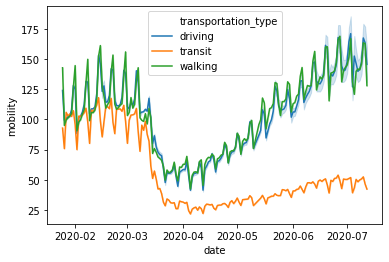

In [28]:
# plot some interesting graphs
filter_state = 'California'
plot_df = usa_merged_data[usa_merged_data['state'] == filter_state]

ax = sns.lineplot(x="date", y="mobility", hue="transportation_type", data=plot_df)

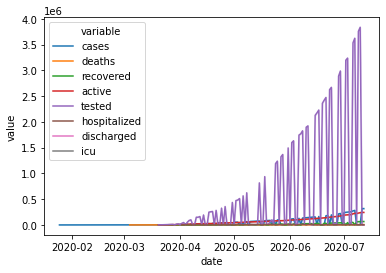

In [29]:
ax = sns.lineplot(x="date", y="value", hue="variable", data=plot_df)

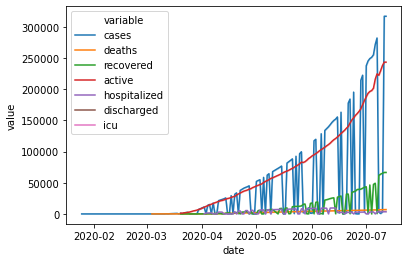

In [30]:
ax = sns.lineplot(x="date", y="value", hue="variable", data=plot_df[plot_df['variable']!='tested'])

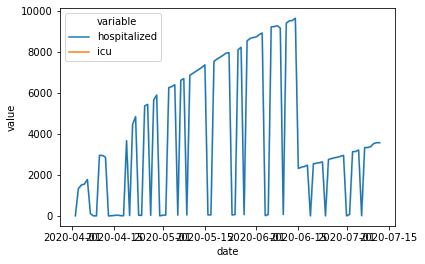

In [31]:
ax = sns.lineplot(x="date", y="value", hue="variable", data=plot_df[plot_df['variable'].isin(['hospitalized','icu'])])

### 02v. Quick Feature Engineering

In [32]:
# create time variables
usa_merged_data['date'] = pd.to_datetime(usa_merged_data['date'])
usa_merged_data['month'] = usa_merged_data['date'].apply(lambda x: x.month)
usa_merged_data['week'] = usa_merged_data['date'].apply(lambda x: x.week)
usa_merged_data['weekday'] = usa_merged_data['date'].apply(lambda x: x.weekday())

In [33]:
# create time order variable by group


In [34]:
# create lagged variables


In [35]:
# mean smoothing of outcome variable (ignore zeros by filling from last reported qty)


### 02vi. Quick Forecasts

In [36]:
import lightgbm as lgb

In [37]:
# Input variables
cat_var = []
num_var = []
df_train_columns = cat_var + num_var
for column in cat_var:
    data[column] =  data[column].astype('category')
    
# Outcome variables
target_var = 'SoldQty28Days'

# Define Columns
date_variable = 'date'

# Model Parameters
validate_from = '2019-01-01' 
train_till = '2019-06-01'

# Train Test Split
data[date_variable] = pd.to_datetime(data[date_variable])
main_data = data[data[date_variable] < pd.to_datetime(train_till)].copy()
test = data[data[date_variable] >= pd.to_datetime(train_till)].copy()
train = main_data[main_data[date_variable] < pd.to_datetime(validate_from)].copy()
val = main_data[main_data[date_variable] >= pd.to_datetime(validate_from)].copy()

NameError: name 'data' is not defined

In [ ]:
# Create the LightGBM data containers
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_var)
lgb_val = lgb.Dataset(X_val, label=y_val)

# to record eval results for plotting
evals_result = {} 

# Train the model
parameters = {
    'random_state':0,
    'application': 'regression',
    'objective': 'regression',
    'metric': ["mse"],
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 30,
    'max_depth':5,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_iterations': 300
}
# parameters = {
#     'application': 'regression',
#     'objective': 'regression',
#     'metric': ["mse"],
#     'is_unbalance': 'true',
#     'boosting': 'gbdt',
#     'num_leaves': 500,
#     'feature_fraction': 0.5,
#     'bagging_fraction': 0.5,
#     'bagging_freq': 20,
#     'learning_rate': 0.05,
#     'verbose': 0
# }

model = lgb.train(parameters,
                  lgb_train,
                  valid_sets=lgb_val,
                  num_boost_round=100,
                  evals_result=evals_result,
                  early_stopping_rounds=30)